<a href="https://colab.research.google.com/github/AmirHPartovi/MNIST/blob/master/MNIST_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Create Model with ANN for MNIST

# Import Tensorflow and keras models, layers, dataset

In [3]:
import tensorflow as tf
print(tf.__version__)
import tensorflow.keras as keras

2.18.0


# Load Data


In [4]:
# Load Data
mnist = keras.datasets.mnist
(x_train , y_train), (x_test , y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


# Train set & Test set


In [5]:
# Train set & Test set
x_train , x_test = x_train / 255.0 , x_test / 255.0
print("X_train Shape",x_train.shape)

X_train Shape (60000, 28, 28)


# Build Model


In [6]:
# Build Model
model = keras.models.Sequential([
    keras.Input(shape=(28,28)),
    keras.layers.Flatten(),
    keras.layers.Dense(128,activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10,activation='softmax')

])

#Compile The Model

In [7]:
# Compile Model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the Model

In [8]:
# Train the Model
fit = model.fit(x_train, y_train,
                validation_data=(x_test , y_test),
                epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8610 - loss: 0.4828 - val_accuracy: 0.9597 - val_loss: 0.1385
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.9558 - loss: 0.1499 - val_accuracy: 0.9699 - val_loss: 0.0966
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9680 - loss: 0.1051 - val_accuracy: 0.9723 - val_loss: 0.0882
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9728 - loss: 0.0867 - val_accuracy: 0.9752 - val_loss: 0.0778
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9779 - loss: 0.0721 - val_accuracy: 0.9770 - val_loss: 0.0750
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9809 - loss: 0.0619 - val_accuracy: 0.9785 - val_loss: 0.0667
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9815 - loss: 0.0575 - val_accuracy: 0.9789 - val_loss: 0.0687
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9839 - loss: 0.0492 - 

#Loss Per Iteration

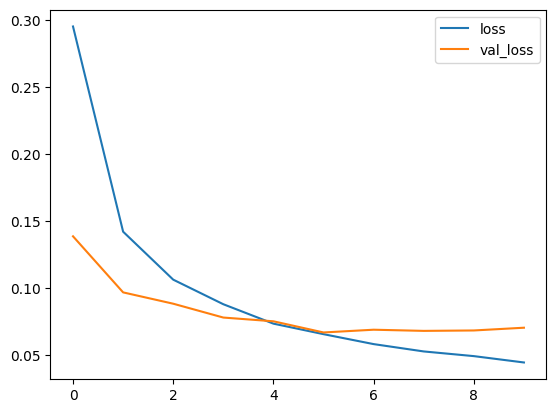

In [9]:
# Plot Los per Iteraton
import matplotlib.pyplot as plt
plt.plot(fit.history['loss'],label='loss')
plt.plot(fit.history['val_loss'],label='val_loss')
plt.legend()

Accuracy per Iteration

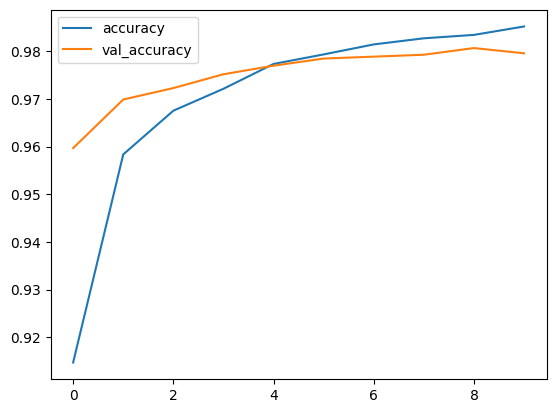

In [10]:
# Plot Accuray per Iteration
plt.plot(fit.history['accuracy'],label='accuracy')
plt.plot(fit.history['val_accuracy'],label='val_accuracy')
plt.legend()

# Evaluatate the Model

In [11]:
# Evaluatate the Model
model.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9762 - loss: 0.0858


[0.0702204555273056, 0.9796000123023987]

#Confussing Matrix

In [26]:
# Plot Confussing Matrix
import numpy as np
from sklearn.metrics import confusion_matrix
import itertools
y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred,axis=1)
cm = confusion_matrix(y_test,y_pred)


def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Greens):

    """
    Showing Confusing Matrix Plot
    & Normalization is optional `Normalize =True`
    """

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


Confusion matrix, without normalization
[[ 973    1    1    0    0    1    2    1    1    0]
 [   0 1125    2    0    0    0    2    1    5    0]
 [   7    1 1012    1    3    0    1    4    3    0]
 [   2    0    5  991    0    4    0    6    2    0]
 [   1    0    0    0  967    1    6    1    1    5]
 [   2    1    0    9    2  864    6    1    6    1]
 [   4    3    1    1    3    4  942    0    0    0]
 [   2    6    9    1    0    0    0 1008    2    0]
 [   9    0    3    1    4    2    2    4  946    3]
 [   2    6    0    7   12    2    0    9    3  968]]


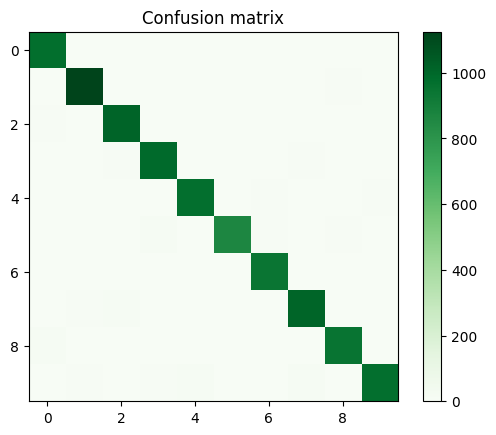

In [27]:
class_names = [str(i) for i in range(10)]
plot_confusion_matrix(cm, classes=class_names)